# SENTIMENTAL ANALYSIS OF CAR REVIEWS

## Dataset (car_reviews.csv)
We were provided with a large dataset of reviews for Ford motor vehicles (car_reviews.csv). Each review is
labelled with either ‘Pos’ or ‘Neg’ to indicate whether the review has been assessed as positive or negative in the
sentiment it expresses. We have treated these labels as a reliable indicator of sentiment. We have assumed that there
are no neutral reviews. There are 1,382 reviews in the CSV file in total, 691 of which are positive and 691 of which
are negative.

## Task 1

In this Jupyter notebook, I have implement a `Naïve Bayes classifier` using 80% (1106) of the reviews as training data. The
training data was selected at random from the full dataset. Classifier was tested using the remaining 20% (276)
of the reviews and classifier’s performance was reported using a `confusion matrix`.

## Loading the Data
The very first step to start any data science analysis is to load the data. I have used `pandas` to upload the file containing reviews in CSV file. The CSV file was uploaded to the jupyter platform.

In [1]:
# reading data from CSV file (file uploded to jupyter notebook)
import pandas as pd
datafile = pd.read_csv("car_reviews.csv")
# showing how data looks like
datafile.head(15)

,Sentiment,Review
0,Neg,In 1992 we bought a new Taurus and we really ...
1,Neg,The last business trip I drove to San Franci...
2,Neg,My husband and I purchased a 1990 Ford F250 a...
3,Neg,I feel I have a thorough opinion of this truc...
4,Neg,AS a mother of 3 all of whom are still in ca...
5,Neg,The Ford Winstar is a car that I would not re...
6,Neg,We bought this van in 1999 after having been...
7,Neg,I bought the Focus wagon for it s cargo space...
8,Neg,You ve probably heard about the giant 2000 Fo...
9,Neg,If you thought that the GMC Chevrolet Suburba...


In [18]:
# Types and Number of each sentiment
datafile.Sentiment.value_counts()

Neg    691
Pos    691
Name: Sentiment, dtype: int64

## Importing Required Libraries

Apart from pandas, there are other library that I will be using to carry out the analysis. I will be explaining the implementation of each library later in the notebook.

In [2]:
import numpy as np
import seaborn as sns
import re
from IPython.display import display
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score

After importing the data, it it important to clean it. *Natural Language Toolkit*, `NLTK`, has been used to do the necessary processing. Cleaning of the data should include: 
1. Identifying and excluding all punctuation and words that are not likely to affect sentiment (e.g. stopwords2).
2. ensuring that remaining words are not case sensitive (i.e. the classifier should not distinguish upper/lower case characters).

`.lower` and `re.sub` is used to convert the text to lowercase and removing required character from text respectively. List of `stopwords` provided by `nltk` is used alongside with `word_tokenize` and `PortStemmer` function.

In [3]:
# Downloading stopwords and word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suhai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suhai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Cleaning Function
It is carried out in following steps:
1. Converting text to lowercase
2. Removing characters other than alphabets and Numbers.
3. Splitting text into tokens
4. Stemming to reduce the lenght of sparse vectors

In [4]:
# assigning PorterStemmer as ps
ps = PorterStemmer()

# defining clean function
def data_clean(review):
    
    # converting text to lowercase
    lower_review = review.lower()
    # excluding characters other than alphabets and numbers
    filtered_review = re.sub('[^a-z0-9]', ' ', lower_review)
    # tokenizing words
    tokenize = word_tokenize(filtered_review)
    # Implementing stemming
    stem_words_list = [ps.stem(word) for word in tokenize if word not in set(stopwords.words('english'))]
    # converting list to string
    final_cleaned_review = ' '.join(stem_words_list)
    
    return final_cleaned_review

## Preview of Cleaning Function
It demonstrates the cleaning function of one review. It outputs the original, lowercase, and final cleaned text.

In [5]:
# Taking fourth review at random
original_review = datafile['Review'][3]

# Implementing the above cleaning function line by line for fourth review
lower_review = original_review.lower()
filtered_review = re.sub('[^a-z0-9]', ' ', lower_review)
tokenize = word_tokenize(filtered_review)
stem_words_list = [ps.stem(word) for word in tokenize if word not in set(stopwords.words('english'))]
final_cleaned_review = " ".join(stem_words_list)

# Outputtinf the original review, lower review and cleaned review for comparision
print('Original Review:\n')
print(original_review)
print('\n')
print('Review in Lowercase:\n')
print(lower_review)
print('\n')
print('Review after Cleaning: \n')
print(final_cleaned_review)

Original Review:

 I feel I have a thorough opinion of this truck compared to most who post evaluations of their vehicles  My truck has been owned by me since new and currently have 75k miles  I ve been meticulous with maintenance and treating my truck with normal duty activities  never exceeding the manufacturer s recommendations This is information regarding my vehicle and the excessive amount of problems found during an inspection 15 Sept 2003  It s reference for anyone else who has had the same problems or looking for information regarding warranties and extended warranties  You are welcome to give some feedback  VEHICLE  2000 FORD F150 5 4L 4x4 XLT w  Off Road   Tow Package 17  Rims  Everything factory install  all the top options included  EXTENDED WARRANTY  Purchased FORD s version 75K mile Bumper to Bumper coverage when new  50 deductible per drive in occurrence  DRIVING CONDITIONS  Never taken off road  Never towed anything of significant weight and Never used inappropriately 

## Preview of Stemming Process
In the stemming process, we use `PortStemmer` function on words that have the same stem. This function returns the stem of the multiple words. Here, the stem of each words have been added to list using list comprehension method.

In [6]:
# Examples of words with same stem
preview_list1 = ['evaluate', 'evaluating', 'evaluate', 'evaluation']
preview_list2 = ['plays', 'played', 'playing', 'play']
preview_list3 = ['drive', 'drives', 'driving']

# calling portstemmer function on each list of words

stem_list1 = [ps.stem(word) for word in preview_list1]
stem_list2 = [ps.stem(word) for word in preview_list2]
stem_list3 = [ps.stem(word) for word in preview_list3]

# outputting the list of words with their stem
print(str(preview_list1) + ':    ' + str(stem_list1))
print('')
print(str(preview_list2) + ':                   ' + str(stem_list2))
print('')
print(str(preview_list3) + ':                          ' + str(stem_list3))
print('')

['evaluate', 'evaluating', 'evaluate', 'evaluation']:    ['evalu', 'evalu', 'evalu', 'evalu']

['plays', 'played', 'playing', 'play']:                   ['play', 'play', 'play', 'play']

['drive', 'drives', 'driving']:                          ['drive', 'drive', 'drive']



In [7]:
preview_list1 = ['evaluate', 'evaluating', 'evaluate', 'evaluation']
preview_list2 = ['plays', 'played', 'playing', 'play']
preview_list3 = ['drive', 'drives', 'driving']

preview_list2[0] + preview_list2[1] + preview_list2[2] + preview_list2[3]

'playsplayedplayingplay'

In [8]:
''' takes time to run'''

# storing processed review in a list
review_list = []

# iterating over each review 
for i in range(datafile.shape[0]):
    # selecting review from review column
    review = datafile.iloc[i, 1]
    # performing cleaning on review using clean function
    cleaned_review = data_clean(review)
    # storing clean review to the list
    review_list.append(cleaned_review)

## Bag of Words Technique

In laymen terms, BOW model converts text in the form of numbers which can then be used in an algorithm for analysis. Specifically, BOW model is used for feature extraction in text data. It returns a vector with all the words and the number of times each word is repeated. It is known as BOW because it is only concerned with the number of times a word is repeated rather than the order of words.

The below cell demonstrates the implementation of *bag of words* technique by creating a vector of first 5 reviews of datafile. Cleaning function is called on each to review to process it. Vectors of tokens are generated for each word using `CountVectorizer` of `sklearn`. The result is then converted into a dataframe. The ouput shows the different words in the review and the number of times, they have occured in each review.

In [9]:
# iterating over the first five reviews of datafile

for i in range(5):
    review = datafile['Review'][i]
    # calling data_clean function
    cleaned_review = data_clean(review)
    # creating vector of each token
    vect = CountVectorizer()
    vector = vect.fit_transform([cleaned_review])
    # converting vector in dataframe
    DF = pd.DataFrame(vector.A, columns = vect.get_feature_names())
    # ouputting vector dataframe for each review
    print('\n')
    print('Count Vector for Review ' + str(i+1) + ':')
    display(DF)



Count Vector for Review 1:


,1992,1999,anyway,back,batteri,bought,buy,car,card,care,...,take,tank,tauru,thee,think,tire,tri,version,way,would
0,3,1,1,1,1,2,1,1,1,1,...,1,1,3,1,1,1,1,1,1,2




Count Vector for Review 2:


,115,1999,allow,anoth,anyon,area,basi,better,breez,busi,...,uncomfort,unnecessarili,us,usag,usual,weigh,well,went,work,would
0,1,2,1,1,1,1,1,1,1,2,...,4,1,3,1,1,1,1,1,1,2




Count Vector for Review 3:


,000,10mpg,1700,1990,200,70,98,addit,air,also,...,valv,vehicl,vibrat,week,went,within,work,wrong,yard,year
0,2,1,1,1,1,1,1,1,3,1,...,1,4,1,5,2,3,1,1,1,1




Count Vector for Review 4:


,000,10,15,17,2000,2003,30k,36k,400,4l,...,upset,use,valu,vehicl,version,warranti,weight,welcom,xlt,yet
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,5,1,8,1,1,1,1




Count Vector for Review 5:


,200sx,abl,acceler,ad,addit,almost,alot,alway,anyon,avoid,...,trade,transport,van,vehicl,way,well,windstar,worri,would,yet
0,1,1,1,1,1,1,2,1,1,1,...,1,1,4,4,3,2,4,1,1,1


## Defining Function for displaying confusion matrix

A confusion matrix is a performance measurement technique for Machine learning classification. It is a kind of table which helps you to the know the performance of the classification model on a set of test data for that the true values are known. The confusion matrix function of `sklearn` has been used for this task. It generates a 2x2 matrix of numbers. In order to give more meaningful and insightful results, I used `seaborn` to display a more visual confusion matrix with annotations indicating the proportion of *True Negatives, False Positives, False Negatives and True Positives.

In [10]:
def result(values):
    
    # matrix labels
    types = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    # count of each type
    type_count = ["{0:0.0f}".format(value) for value in values.flatten()]
    # percentage of each type
    type_percent = ["{0:.2%}".format(value) for value in (values.flatten() / np.sum(values))]
    
    # converting all values to list
    label = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip (types, type_count, type_percent)]
    label = np.asarray(label).reshape(2,2)
    
    # using seaborn to create a heatmap
    chart = sns.heatmap(values, annot = label, fmt = '', cmap = 'PiYG')
    
    return chart

## Splitting of Data

We will now split the data for training and testing to check how well our model has performed.  We will use: `scikit_learn’s` `train_test_split()` for splitting the text_count. The data has been split in the the ratio of 80/20, i.e, 80% of training data and 20% of testing data. The trainig set contains 1106 reviews while the classifier has been tested with 276 reviews. Therefore, `test_size` has been set to 276 to get the required data split. The number of review in the training set and testing set has been confirmed by printing there values. 

In [11]:
# creating vector, by defualt unigram
CV = CountVectorizer()

X = CV.fit_transform(review_list).toarray()
Y = datafile.iloc[:, 0]

# splitting into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 276, random_state = 1400)

# Outputting training and testing size
print('Training Size: ' + str(len(X_train)) + '.')
print('Testing Size: ' + str(len(X_test)) + '.')

Training Size: 1106.
Testing Size: 276.


## Defining the Model

We will be using **Naive Bayes Classifier** for defining the model. Specifically, we will use the `MultinomialNB()` from `sklearn`. 

### Naive Bayes Model

This model applies Bayes theorem with a Naive assumption of no relationship between different features. According to Bayes theorem:

                                   Posterior = likelihood * proposition/evidence
                                   
                                                           or
                                                           
                                            P(A|B) = P(B|A) * P(A)/P(B)
                                            
For an input with several variables:

                              P(y|x1, x2, … xn) = P(x1, x2, … xn|y)* P(y)/P(x1,x2, …xn)
                              
with Naive Bayes we assume x1, x2 … xn are independent of each other, i.e:

                                     P(x1, x2, … xn|y) = P(x1|y) * P(x2|y) … * P(xn|y)
                                     
The assumption in distribution of P(xi|y) give rise to different NBM. For multinomial distribusion will give Multinomial Naive Bayes (MNB). 

## Compliling the Model

For compling the model `MultinomialNB()` from sklearn has been called.

In [12]:
#using Multinomial Naive Bayes classifier on training data from scikit-learn
MNB = MultinomialNB()

## Fitting the Model

In fitting the model, the classifier is fitted with the using training set. `X_train` and `Y_train` is what the classifier is going to be trained on. To show that only the training data has been used to the point where the model has been trained, the length of both `X_train` and `Y_train` is shown using print statements.

In [13]:
MNB.fit(X_train, Y_train)

print('X_train size: ' + str(len(X_train)) + '.')
print('Y_train size: ' + str(len(Y_train)) + '.')

X_train size: 1106.
Y_train size: 1106.


## Evaluating the model

Here we quantify the quality of our model. We use `confusion_matrix`, `accuracy_score` module from the sklearn library to evaluate the predictions. The classifier is then run on the test data. The accuracy of the classifier on the test data can be found using the `accuracy_score` method. The accuracy is given as a decimal between 0 and 1. This was multiplied to give a percentage accuracy.

In [14]:
# implementing classifier on test data
Y_pred = MNB.predict(X_test)

CFM = confusion_matrix(Y_test, Y_pred)
accuracy_test = accuracy_score(Y_test, Y_pred)

# ouputting accuracy of train data.
accuracy_train = MNB.score(X_train, Y_train)
print('Task 1 classifier Accuracy Score of Training set: %.2f%% ' % (accuracy_train * 100.0))

# classifier accuracy score ouput
print('Task 1 classifier Accuracy Score of Testing set: %.2f%% ' % (accuracy_test * 100.0))

Task 1 classifier Accuracy Score of Training set: 91.95% 
Task 1 classifier Accuracy Score of Testing set: 75.72% 


## Displaying Confusion Matrix

The display_matrix function has been called to ouput the confusion matrix. It gives an idea about the percentages of True Neg, False Pos, False Neg, and True Pos. 

Confusion Matrix for Classifier 1:


<AxesSubplot:>

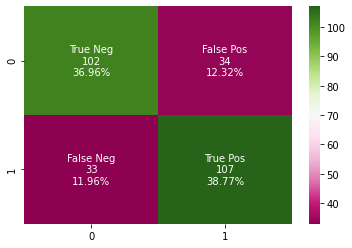

In [15]:
# Confusion Matrix Ouput
print('Confusion Matrix for Classifier 1:')
result(CFM)

# Task 2

In task 2, the goal is to identify and research a way to improve on the solution to Task 1, that can do better at classifying the sentiment of the reviews. 

We may either:

1. Identify an alternative classification algorithm, or
2. Apply modifications to the Naïve Bayes implementation, for example trying different classification of different size n-grams (multi-word phrases). Implement this improvement and compare the results to your initial Naïve Bayes classifier.

In Task 1, the classifier used was `MultinomialNB()` and ngrams were of type **unigram**. The **unigram** involves looking at the words individually. The problem with that if if there is a statement "I am not depressed", and the classifier is trained on unigram, then it will state that the sentiment is negative because it is looking at the words individually. It considers the word "depressed" and would not consider "not depressed" as a sentiment. This completely changes the sentiment of the reviews. 
This is the reason, I will try to train my classifier on different n-gram like **bigram** to have a better look at the situtaion like this. I would also be trying to implement a different Naive Bayes classifier than `MultinomalNB()`. I will be implementing `ComplementNB()` to have a look how the accuracy changes by using a different type of Naive Bayes classifier.
I will be showing here only those method which resulted in the increase of the performance. But to have a look at different methods other naive bayes classifier to complete this task, We can also refer this article on sentiment analysis[1].

### References:

[1] Sharma, M: Sentiment Analysis: An Introduction to Naive Bayes Algorithm. Article, Towards Data Science(2020).

https://towardsdatascience.com/sentiment-analysis-introduction-to-naive-bayes-algorithm-96831d77ac91

## Trying different n_gram 

As discussed above, using different ngram may result in improvement of the accuracy of the classifier as they considers multiple words at once. Here I have demonstrated the use of **bigram** with `MultinomialNB()` which resulted in the increase of the accuracy of the classifier. For my case, it would be the issue of reviews that might have had a negation word before a positive word would have been classified incorrectly as positive instead of negative and vice versa. Using bigrams along with unigrams would prevent this issue and the expected result would be an increase in the accuracy of the classifier and a reduction in the number False Negatives and False Positives in the confusion matrix. While using bi-gram the improvement can be small but even a non significant improvement over task 1 would be considered [2].

### References:

[1] Bekkerman, R., Allan, J.: Using bigrams in text categorization. Technical report, University of Massachusetts (2003) https://ciir-publications.cs.umass.edu/getpdf.php?id=552




### Bi-gram

Task 2 classifier Accuracy Score of Training set: 100.00% 
Task 2 classifier Accuracy Score of Testing set: 79.35% 

Confusion Matrix for Classifier 2:


<AxesSubplot:>

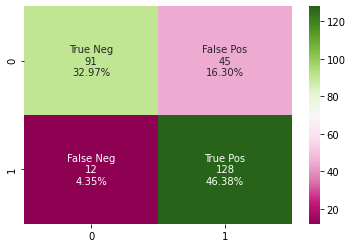

In [16]:
""" By defualt the CountVectorizer uses ngram. To train our classifier on bigram we can change the ngrame range to (2,2),
     while (1,1) specifies to ngram. We can also play with different range of ngram like (1,2) or (2,3)"""

CV2 = CountVectorizer(ngram_range=(2,2))

X2 = CV2.fit_transform(review_list).toarray()
Y2 = datafile.iloc[:, 0]

# splitting data in test and train using sklearn
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 276, random_state = 1400)

# implementing the multinomialNB classifier
MNB2 = MultinomialNB()
MNB2.fit(X2_train, Y2_train)

# test pred
Y_pred2 = MNB2.predict(X2_test)

# Printing metrics 
CFM2 = confusion_matrix(Y2_test, Y_pred2)
accuracy_test2 = accuracy_score(Y2_test, Y_pred2)

# train pred
accuracy_train2 = MNB2.score(X2_train, Y2_train)
print('Task 2 classifier Accuracy Score of Training set: %.2f%% ' % (accuracy_train2 * 100.0))
print('Task 2 classifier Accuracy Score of Testing set: %.2f%% ' % (accuracy_test2 * 100.0))
print('')

# Outputting matrix heatmap
print('Confusion Matrix for Classifier 2:')
result(CFM2)

## Trying Different Naive Bayes

Another approach of this task would be to try different Naive Bayes Classifier like `GaussianNB()` or `ComplementNB()`. Using `ComplementNB()` demonstrated improved result. This model was created specifically to deal with the case where the training data is biased towards one class[3]. Although, It showed no or very little improvements (depends on random state) with the current dataset and I believe it is worth trying with different datasets.

### References:

[2] Science, D: How To Predict Natural Language Sentiment Using A Naive Bayes Classifier. Article, Towards Data Science (2021).
https://medium.com/the-data-science-publication/how-to-predict-natural-language-sentiment-using-naive-bayes-classifier-6ab6eb28fd6d

### Complement NB

Task 2 classifier Accuracy Score of Training set: 91.95% 
Task 2 classifier Accuracy Score of Testing set: 75.72% 

Confusion Matrix for Classifier 2:


<AxesSubplot:>

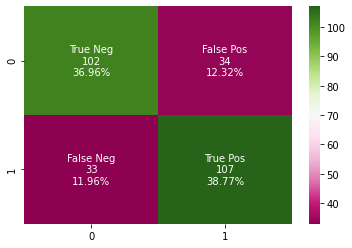

In [17]:
CV3 = CountVectorizer()

X3 = CV3.fit_transform(review_list).toarray()
Y3 = datafile.iloc[:, 0]

# splitting data in test and train using sklearn
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = 276, random_state = 1400)

# implementing complementNB
from sklearn.naive_bayes import ComplementNB
CNB = ComplementNB()
CNB.fit(X3_train, Y3_train)

# test pred
Y_pred3 = CNB.predict(X3_test)

# Printing metrics 
CFM3 = confusion_matrix(Y3_test, Y_pred3)
accuracy_test3 = accuracy_score(Y3_test, Y_pred3)

# train pred
accuracy_train3 = CNB.score(X3_train, Y3_train)
print('Task 2 classifier Accuracy Score of Training set: %.2f%% ' % (accuracy_train3 * 100.0))
print('Task 2 classifier Accuracy Score of Testing set: %.2f%% ' % (accuracy_test3 * 100.0))
print('')

# Outputting matrix heatmap
print('Confusion Matrix for Classifier 2:')
result(CFM3)

## Comparision of Task 2 vs Task 1

The approach used in task 2 demonstrated very little improvement than task 1. This is evident by an increase in the accuracy of the classifier by around 4% when using **bigram** while little to no improvements while using `ComplementNB()`. In the **bigram** approach, the classifier predicted all the sentiments correctly on the training data. While in the unigram approach of task 1, it showed only 91.95% of accurate predictions on the training data. These percentages should be noted for the random state = 1400. It is bound to change for different values of random state. The `ComplementNB()` predicted similar accuracy as that of `MultinomialNB()` but if the random state of the classifier is change from 1400 to say 1420, it can show a little change in the accuracy of the classifier. It can be lower or more than the `MultinomialNB()` and will depend on the value of random state.

It can be seen in the confusion matrices of unigram and bigram approaches, that the number of False Negatives decreased  from 33 to 12 while there was a little increase in False Positives from 34 to 45. Overall the the number of True Positives and True Negatives Increased and we got a better accuracy for test set from 75.72% to 79.35%. The reason this improvement can be seen was most likely due to the issue that was stated earlier not occuring (where a positive word could have a negative word in front changing the meaning). A couple of the reviews that were flagged as positive or negative could've had this sort of language structure in them and hence they were able to be accurately identified with the improved solution.

The distinction in recording for False Positives, False Negatives and exactness isn't sufficiently high to be named as huge. This improvement must be seen for this specific random_state. Assuming this was run with an alternate random_state for the preparation and testing split, various outcomes should have been visible and a reduction in execution isn't remarkable. The exactness and disarray lattice will be shift for each random_state that is picked. Anyway for this specific random state and split, it apparently had an improvement. The little expansion in execution shows that utilizing unigrams is sufficient at fitting a classifier to distinguish the right feeling. It possibly bombs when a particular construction of sentence is experienced where an invalidation word isn't sufficiently able to "counter" a profoundly certain feeling word that follows it.